In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.optim as optim
import gc

# from sklearn import svm, decomposition
from preprocess import remove_high_freq, whitening, from_cifar_to_np, from_submit_to_np
from plot import imshow
from util import trainNN, cal_accuracy, cal_class_accuracy, get_submit_result, export_to_file, print_accracy
from models import *

use_pca = False
use_forieum = False
export_csv = True
csv_name = 'res5.csv'
BATCH_SIZE = 32

In [3]:
print('==> Preparing data..')
transform_train = transforms.Compose(
    [
         transforms.RandomRotation(5),
         transforms.RandomCrop(32, padding=4),
#          transforms.RandomResizedCrop(32),
         transforms.RandomHorizontalFlip(),
#          transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05),
         transforms.ToTensor(),
         transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
         remove_high_freq
    ]) if use_forieum else transforms.Compose(
    [
         transforms.RandomRotation(5),
         transforms.RandomCrop(32, padding=4),
#          transforms.RandomResizedCrop(32),
         transforms.RandomHorizontalFlip(),
#          transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05),
         transforms.ToTensor(),
         transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ]) 

transform_test = transforms.Compose(
    [
         transforms.ToTensor(),
         transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
         remove_high_freq
    ]) if use_forieum else transforms.Compose(
    [
         transforms.ToTensor(),
         transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ]) 


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=0)
submitset = np.load("./test/y_test.npy")

submit_images = [ transform_test(img) for img in submitset]

submitloader = torch.utils.data.DataLoader(submit_images, batch_size=2,
                                          shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified


In [4]:
trainX, trainY = from_cifar_to_np(trainloader)
if not use_forieum:
    trainX = np.reshape(trainX, (50000, 3072))
print(trainX.shape)
print(trainY.shape)

(50000, 3072)
(50000,)


In [5]:
testX, testY = from_cifar_to_np(testloader)
if not use_forieum:
    testX = np.reshape(testX, (10000, 3072))
print(testX.shape)
print(testY.shape)

(10000, 3072)
(10000,)


In [6]:
submitX = from_submit_to_np(submitloader)
if not use_forieum:
    submitX = np.reshape(submitX, (12000, 3072))
print(submitX.shape)

(12000, 3072)


In [7]:
# Assume that we are on a CUDA machine, then this should print a CUDA device:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


torch.Size([128, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane  frog  bird  frog horse  deer  ship  ship


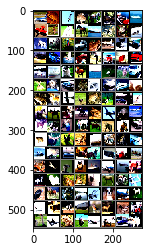

In [8]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print(images)
print(images.size())

# show images in a batch, which contains 8 images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [9]:
print('==> Building model..')
# net = SeventySevenNet()
# net = ResNet18()
# net = LargeNet()
net = VGG('VGG19')
net = net.to(device)
criterion = nn.CrossEntropyLoss()

==> Building model..


In [10]:
for i in range(15): 
    optimizer = optim.SGD(net.parameters(), lr=1e-1, momentum=0.9, weight_decay=5e-4)
    trainNN(net, trainloader, optimizer, criterion,  1)
    print('Accuracy of the network on the 10000 test images: %f %%' % (
        100 * cal_accuracy(net, testloader)))
    print('Accuracy of the network on the train images: %f %%' % (
        100 * cal_accuracy(net, trainloader)))

Training starts
Accuracy of the network on the 10000 test images: 12.520000 %
Accuracy of the network on the train images: 12.368000 %
Training starts
Accuracy of the network on the 10000 test images: 20.710000 %
Accuracy of the network on the train images: 20.254000 %
Training starts
Accuracy of the network on the 10000 test images: 29.350000 %
Accuracy of the network on the train images: 28.576000 %
Training starts
Accuracy of the network on the 10000 test images: 33.550000 %
Accuracy of the network on the train images: 34.486000 %
Training starts
Accuracy of the network on the 10000 test images: 43.530000 %
Accuracy of the network on the train images: 44.720000 %
Training starts
Accuracy of the network on the 10000 test images: 51.960000 %
Accuracy of the network on the train images: 52.498000 %
Training starts
Accuracy of the network on the 10000 test images: 62.010000 %
Accuracy of the network on the train images: 62.680000 %
Training starts
Accuracy of the network on the 10000 te

In [11]:
for i in range(10): 
    optimizer = optim.SGD(net.parameters(), lr=1e-2, momentum=0.9, weight_decay=5e-4)
    trainNN(net, trainloader, optimizer, criterion,  1)
    print('Accuracy of the network on the 10000 test images: %f %%' % (
        100 * cal_accuracy(net, testloader)))
    print('Accuracy of the network on the train images: %f %%' % (
        100 * cal_accuracy(net, trainloader)))

Training starts
Accuracy of the network on the 10000 test images: 83.630000 %
Accuracy of the network on the train images: 86.452000 %
Training starts
Accuracy of the network on the 10000 test images: 83.810000 %
Accuracy of the network on the train images: 87.622000 %
Training starts
Accuracy of the network on the 10000 test images: 84.460000 %
Accuracy of the network on the train images: 88.408000 %
Training starts
Accuracy of the network on the 10000 test images: 84.940000 %
Accuracy of the network on the train images: 88.820000 %
Training starts
Accuracy of the network on the 10000 test images: 84.990000 %
Accuracy of the network on the train images: 89.964000 %
Training starts
Accuracy of the network on the 10000 test images: 85.300000 %
Accuracy of the network on the train images: 90.108000 %
Training starts
Accuracy of the network on the 10000 test images: 85.230000 %
Accuracy of the network on the train images: 90.470000 %
Training starts
Accuracy of the network on the 10000 te

In [12]:
for i in range(10): 
    optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9, weight_decay=1e-2)
    trainNN(net, trainloader, optimizer, criterion,  1)
    print('Accuracy of the network on the 10000 test images: %f %%' % (
        100 * cal_accuracy(net, testloader)))
    print('Accuracy of the network on the train images: %f %%' % (
        100 * cal_accuracy(net, trainloader)))

Training starts
Accuracy of the network on the 10000 test images: 87.230000 %
Accuracy of the network on the train images: 92.794000 %
Training starts
Accuracy of the network on the 10000 test images: 87.120000 %
Accuracy of the network on the train images: 93.164000 %
Training starts
Accuracy of the network on the 10000 test images: 87.400000 %
Accuracy of the network on the train images: 93.212000 %
Training starts
Accuracy of the network on the 10000 test images: 87.450000 %
Accuracy of the network on the train images: 93.374000 %
Training starts
Accuracy of the network on the 10000 test images: 87.050000 %
Accuracy of the network on the train images: 93.528000 %
Training starts
Accuracy of the network on the 10000 test images: 87.340000 %
Accuracy of the network on the train images: 93.672000 %
Training starts
Accuracy of the network on the 10000 test images: 87.260000 %
Accuracy of the network on the train images: 93.760000 %
Training starts
Accuracy of the network on the 10000 te

In [13]:
params = list(net.parameters())
print(len(params))

66


In [14]:
cal_class_accuracy(net, testloader)

Accuracy of plane : 90 %
Accuracy of   car : 96 %
Accuracy of  bird : 81 %
Accuracy of   cat : 86 %
Accuracy of  deer : 85 %
Accuracy of   dog : 78 %
Accuracy of  frog : 92 %
Accuracy of horse : 93 %
Accuracy of  ship : 89 %
Accuracy of truck : 82 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


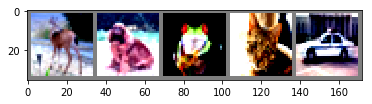

In [15]:
images = submit_images[2100:2105]
imshow(torchvision.utils.make_grid(images))

(2, 3, 32, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


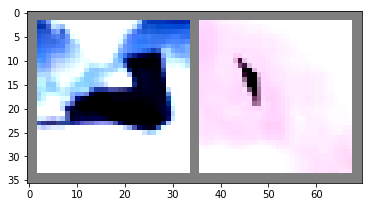

In [16]:
dataiter = iter(submitloader)
images = dataiter.next()
print(np.array(images).shape)
imshow(torchvision.utils.make_grid(images))

In [17]:
gc.collect()

2361

In [18]:
# res_labels = get_submit_result(net, submitloader)
res_per = []
with torch.no_grad():
    for i, data in enumerate(submitloader, 0):
        inputs = data.to(device)
        # forward + backward + optimize
        outputs = net(inputs)
        for o in outputs:
            res_per.append(o)
res_labels = [int(torch.max(t,0)[1]) for t in res_per]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer   dog truck  bird plane   dog   dog truck  ship horse   dog   car truck  bird truck   dog plane   dog  frog horse


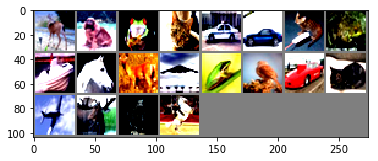

In [19]:
images = submit_images[2100:2120]
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[res_labels[j]] for j in range(2100,2120)))

In [20]:
if export_csv:
    export_to_file(csv_name, res_labels)